# Introduction

Newton's method is a technique that constists of finding a root of a nonlinear equation $f(x) = 0$ on an interval $[a,b]$, where $f$ is two times differentiable function. Newton's method is based on Taylor's approximation.

# Derivation of Newton's Method

Let $f(x)$ be a two times differentiable function on $[a,b]$ and we are looking for a root $p$ of $f(x)$, that is, $p$ such that $f(p) = 0$. Let $p_0$ be an intial guess such that $f(p_0) \neq 0$. The Taylor approximation of $f(x)$ around $p_0$ is given by:

$$
f(x) = f(p_0) + f'(p_0)(x - p_0) + \frac{1}{2}f''(p_0)(x - p_0)^2 + \frac{1}{6}f'''(p_0)(x - p_0)^3 + \dots
$$

Evaluated at $p$, we have:

$$
f(p) = f(p_0) + f'(p_0)(p - p_0) + \frac{1}{2}f''(p_0)(p - p_0)^2 + \frac{1}{6}f'''(p_0)(p - p_0)^3 + \dots
$$

By neglecting terms of higher order, we have:

$$
p \approx p_0 - \frac{f(p_0)}{f'(p_0)}
$$

Hence, from the initial guess $p_0$, Newton's method generates a sequence $(p_n)_{n\geq}$ defined by:

$$
p_{n+1} = p_n - \frac{f(p_n)}{f'(p_n)}
$$

Below is the code that implements Newton's method given a function $f(x)$ and an initial guess $p_0$:

In [16]:
import numpy as np
def f(x):
    # Function whose root we want to find: f(x) = x^3 + 4x^2 - 10
    return x**3 + 4*x**2 - 10
    

def fprime(x):
    # Derivative of the function: f'(x) = 3x^2 + 8x
    return 3*x**2 + 8*x


def newtonsmethod(p0, epsilon, N):
    # Newton's method to find a root of f(x)
    # p0: initial guess
    # epsilon: tolerance for stopping (how close to zero is "good enough")
    # N: maximum number of iterations allowed
    n = 1  # Iteration counter
    while abs(f(p0)) > epsilon and n <= N:
        # Update guess using Newton's formula
        pnew = p0 - f(p0)/fprime(p0)
        p0 = pnew
        n += 1
        if n > N:
            # Stop if maximum iterations exceeded
            print("Exceeded maximum iterations")
        p = p0
    return p, n

maxIterations = 500  # Maximum allowed iterations
epsilon = 1e-3       # Tolerance for stopping
p0 = 10              # Initial guess
root, iterations = newtonsmethod(p0, epsilon, maxIterations)  # Start with initial guess 1.0

if abs(f(root)) <= epsilon:
    print('Root found at:', root)  # Print the root
    print('f({}) ='.format(root), f(root))
    print('Found after', iterations, 'iterations with tolerance =', epsilon)  # Print iterations and tolerance

Root found at: 1.3652305734221728
f(1.3652305734221728) = 9.247639383147543e-06
Found after 8 iterations with tolerance = 0.001


# Geometrical Interpretation and Analysis of Newton's Method

Newton's method has an elegant geometrical interpretation.

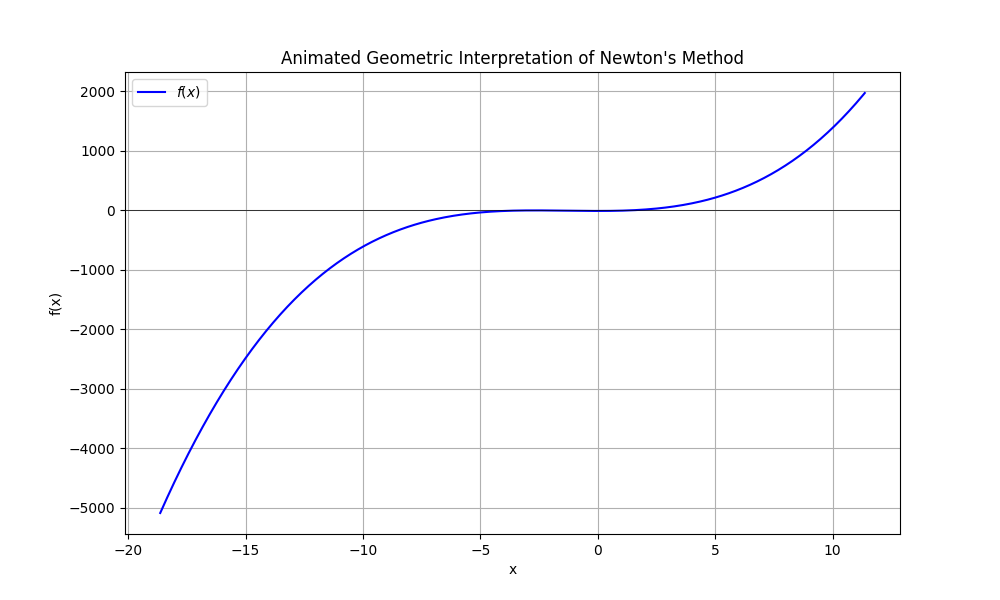

Newton's method iterates:
p_0 = 10.000000, f(p_0) = 1.39e+03
p_1 = 6.342105, f(p_1) = 4.06e+02
p_2 = 3.973527, f(p_2) = 1.16e+02
p_3 = 2.509394, f(p_3) = 3.10e+01
p_4 = 1.714091, f(p_4) = 6.79e+00
p_5 = 1.412737, f(p_5) = 8.03e-01
p_6 = 1.366299, f(p_6) = 1.77e-02
p_7 = 1.365231, f(p_7) = 9.25e-06


In [17]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Newton's method with history tracking
def newtonsmethod_geom(p0, epsilon, N):
    points = [float(p0)]
    n = 1
    while abs(f(p0)) > epsilon and n <= N:
        pnew = p0 - f(p0)/fprime(p0)
        points.append(float(pnew))  # always append as float
        p0 = pnew
        n += 1
    return points, n

points, n = newtonsmethod_geom(p0, epsilon, maxIterations)

if n < maxIterations:
    # Prepare the plot
    root = points[-1]
    x_min = root - 20
    x_max = root + 10
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, label='$f(x)$', color='blue')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.set_title("Animated Geometric Interpretation of Newton's Method")
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True)

    tangent_line, = ax.plot([], [], 'r--', alpha=0.7, linewidth=3)
    point_y, = ax.plot([], [], 'go', zorder=5, markersize=10)

    def init():
        tangent_line.set_data([], [])
        point_y.set_data([], [])
        return tangent_line, point_y

    def animate(i):
        if i >= len(points)-1:
            i = len(points)-2
        x0 = points[i]
        y0 = f(x0)
        slope = fprime(x0)
        tangent_x = np.linspace(x0-1, x0+1, 20)
        tangent_y = slope*(tangent_x - x0) + y0
        tangent_line.set_data(tangent_x, tangent_y)
        point_y.set_data([x0], [y0])
        return tangent_line, point_y

    ani = FuncAnimation(fig, animate, frames=len(points), init_func=init, blit=True, repeat=False, interval=1200)

    plt.show()

    # Convergence analysis
    print("Newton's method iterates:")
    for i, p in enumerate(points):
        print(f"p_{i} = {p:.6f}, f(p_{i}) = {f(p):.2e}")
else:
    print("No root found. Try a different function")

In [12]:
for i, p in enumerate(points):
    print(type(p), p)

<class 'list'> [10, 6.342105263157895, 3.973526532901887, 2.5093942800577533, 1.7140912186455382, 1.4127370960459964, 1.3662992127234335, 1.3652305734221728]
<class 'int'> 8


**Theorem 1:** *Let $f \in C^2$* and $p$ be a root of $f(x) = 0$. Let $I$ be an interval that contains $p$. Let $p_0 \in I$ be an initial guess for the root. If $f''(x) \neq 0$, $\forall x \in I$, and $f''(x)$ is bounded on $I$, then the Newton's method will achieve quadratic convergence.*

**Theorem 2:** *Let $f \in C^2$ an increasing, convex function that has a root. Then this root is unique, and Newton's method will converge to it from any starting point.*

# Secant Method

Although Newton's method has many advantages, it requires to compute the derivative $f'(x)$ of $f(x)$. If the function $f$ is difficult, then computing it's derivative could be difficult too. To avoid this difficulty, we replace the slope $f'(p_n)$ at each iterationby it's approximation:

$$
f'(p_n) = \frac{f(p_n) - f(p_{n-1})}{p_n - p_{n-1}}
$$

This is equivalent to replacing the tangent line at $p_n$ in Newton's Method by the secant line passing by $(p_{n-1}, f(p_{n-1}))$ and $(p_n, f(p_n))$:

$$
y = f(p_n) + \frac{f(p_n) - f(p_{n-1})}{p_n - p_{n-1}}(x - p_n)
$$

Starting from $p_0$ and $p_1$, the secant method is defined as follows:

$$
y = f(p_1) + \frac{f(p_1) - f(p_0)}{p_1 - p_0}(x - p_1)
$$

This line intersects the $x$-axis when $y = 0$. This is equivalent to:

$$
p_2 = p_1 - \frac{f(p_1)(p_1 - p_0)}{f(p_1) - f(p_0)}
$$

We repeat the process with $(p_1, f(p_1))$ and $(p_2, f(p_2))$. We generate therefore the sequence $(p_n)_{n\geq 0}$ defined by:

$$
p_{n+1} = p_n - \frac{f(p_n)(p_n - p_{n-1})}{f(p_n) - f(p_{n-1})}
$$

Below is a code to implement this algorithm, The Secant Method.

In [ ]:
def SecantMethod(p0, p1, epsilon, N):
    """
    Implements the Secant Method for finding a root of f(x) = 0.
    p0, p1: Initial guesses for the root (floats)
    epsilon: Tolerance for stopping criterion
    N: Maximum number of iterations
    Returns: Approximate root and number of iterations used
    """
    n = 1  # Iteration counter
    # Continue iterating while the function value is not close enough to zero and max iterations not reached
    while abs(f(p1)) > epsilon and n <= N:
        # Compute the next approximation using the secant formula
        pnew = p1 - (f(p1)*(p1 - p0))/(f(p1) - f(p0))
        # Update previous points for the next iteration
        p0 = p1
        p1 = pnew
        n += 1  # Increment iteration counter
    # If maximum iterations exceeded, print a warning
    if n > N:
        print("Max iterations exceeded")
    # Return the last approximation and the number of iterations
    return p1, n

# Initial guesses for the Secant Method
p0 = -1
p1 = 10
# Call the Secant Method with the given parameters
secantroot, iterations = SecantMethod(p0, p1, epsilon, maxIterations)

# Check if the found root is within the desired tolerance
if abs(f(secantroot)) <= epsilon:
    print('Root found at:', secantroot)  # Print the root
    print('f({}) ='.format(secantroot), f(secantroot))  # Print the function value at the root
    print('Found after', iterations, 'iterations with tolerance =', epsilon)  # Print iterations and tolerance

Root found at: 1.3652259659875634
f(1.3652259659875634) = -6.683663695739028e-05
Found after 151 iterations with tolerance = 0.001
